In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import string

import nltk
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud
from tqdm.auto import tqdm
import matplotlib.style as style
style.use('fivethirtyeight')
from sklearn.metrics import plot_roc_curve
from numpy import interp
from itertools import cycle
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

C:\Users\ouaoua\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
data = pd.read_csv("r_dataisbeautiful_posts.csv")

C:\Users\ouaoua\AppData\Local\Temp\ipykernel_19820\201968311.py:1: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("r_dataisbeautiful_posts.csv")


In [3]:
data.head()

,id,title,score,author,author_flair_text,removed_by,total_awards_received,awarders,created_utc,full_link,num_comments,over_18
0,hbyv2e,[OC] How Bar Chart Race Animation Can be Creat...,1,Tom10AE,NaN,NaN,0.0,[],1592565317,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
1,hbynoy,[UK] Labour and Conservative vote share by age...,1,Ge0rgeBr0ughton,NaN,NaN,0.0,[],1592564316,https://www.reddit.com/r/dataisbeautiful/comme...,1,False
2,hbym2y,[NOC] Number of wallets returned across the wo...,1,i_am_shattered,NaN,NaN,0.0,[],1592564089,https://www.reddit.com/r/dataisbeautiful/comme...,1,False
3,hbyirw,Largest Banana Producing Countries (1961-2020)...,1,Bilal078692,NaN,moderator,0.0,[],1592563628,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
4,hby1fy,[OC] Popular Combinations for the StamiStudios...,1,shahinrostami,Viz Researcher,NaN,0.0,[],1592561119,https://www.reddit.com/r/dataisbeautiful/comme...,2,False


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183891 entries, 0 to 183890
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     183891 non-null  object 
 1   title                  183890 non-null  object 
 2   score                  183891 non-null  int64  
 3   author                 183891 non-null  object 
 4   author_flair_text      24574 non-null   object 
 5   removed_by             11564 non-null   object 
 6   total_awards_received  44007 non-null   float64
 7   awarders               33332 non-null   object 
 8   created_utc            183891 non-null  int64  
 9   full_link              183891 non-null  object 
 10  num_comments           183891 non-null  int64  
 11  over_18                183891 non-null  bool   
dtypes: bool(1), float64(1), int64(3), object(7)
memory usage: 15.6+ MB


In [7]:
data.describe()

,score,total_awards_received,created_utc,num_comments
count,183891.000000,44007.000000,1.838910e+05,183891.000000
mean,186.652131,0.003636,1.497016e+09,25.382248
std,1969.835481,0.129975,6.372761e+07,195.622576
min,0.000000,0.000000,1.329263e+09,0.000000
25%,1.000000,0.000000,1.447768e+09,1.000000
50%,1.000000,0.000000,1.496235e+09,1.000000
75%,5.000000,0.000000,1.554152e+09,4.000000
max,116226.000000,12.000000,1.592565e+09,18801.000000


In [22]:
del data['id']
del data['author_flair_text']
del data['removed_by']
del data['total_awards_received']
del data['awarders']
del data['created_utc']
del data['full_link']

In [9]:
data.head()

,title,score,author,num_comments,over_18
0,[OC] How Bar Chart Race Animation Can be Creat...,1,Tom10AE,0,False
1,[UK] Labour and Conservative vote share by age...,1,Ge0rgeBr0ughton,1,False
2,[NOC] Number of wallets returned across the wo...,1,i_am_shattered,1,False
3,Largest Banana Producing Countries (1961-2020)...,1,Bilal078692,0,False
4,[OC] Popular Combinations for the StamiStudios...,1,shahinrostami,2,False


In [23]:
data = data.dropna()


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183890 entries, 0 to 183890
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         183890 non-null  object
 1   score         183890 non-null  int64 
 2   author        183890 non-null  object
 3   num_comments  183890 non-null  int64 
 4   over_18       183890 non-null  bool  
dtypes: bool(1), int64(2), object(2)
memory usage: 7.2+ MB


In [24]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
score,183890.0,186.653146,1969.840789,0.0,1.0,1.0,5.0,116226.0
num_comments,183890.0,25.382386,195.623099,0.0,1.0,1.0,4.0,18801.0


<AxesSubplot:xlabel='score', ylabel='Density'>

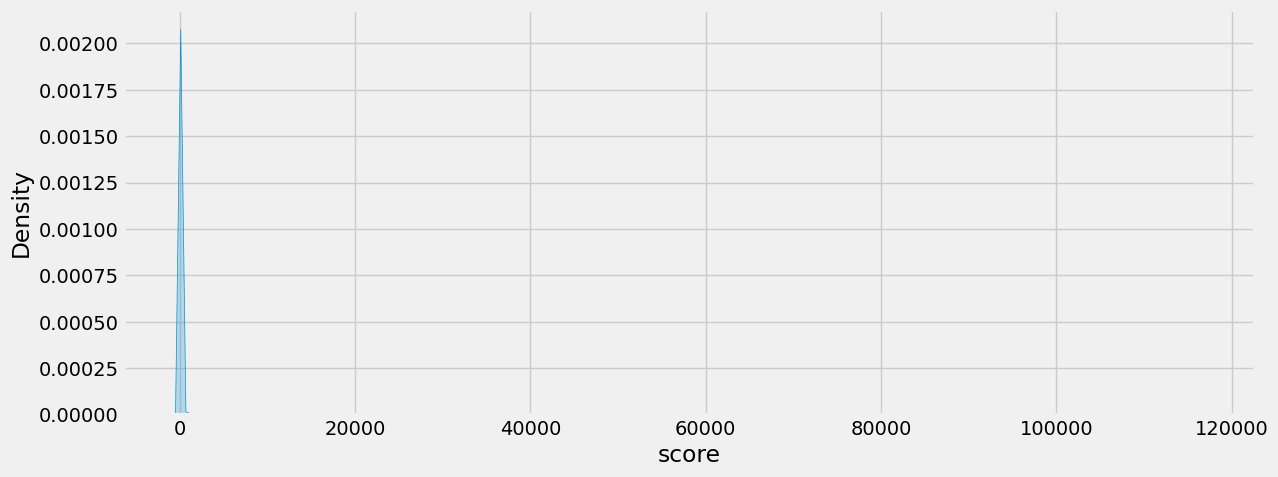

In [25]:
plt.figure(figsize=(13,5))

sns.kdeplot(data['score'], shade=  True)

In [14]:
print(len(data[data['score'] < 10]), 'Posts with less than 10 votes')
print(len(data[data['score'] > 10]), 'Posts with more than 10 votes')

150490 Posts with less than 10 votes
31696 Posts with more than 10 votes


<AxesSubplot:xlabel='num_comments', ylabel='Density'>

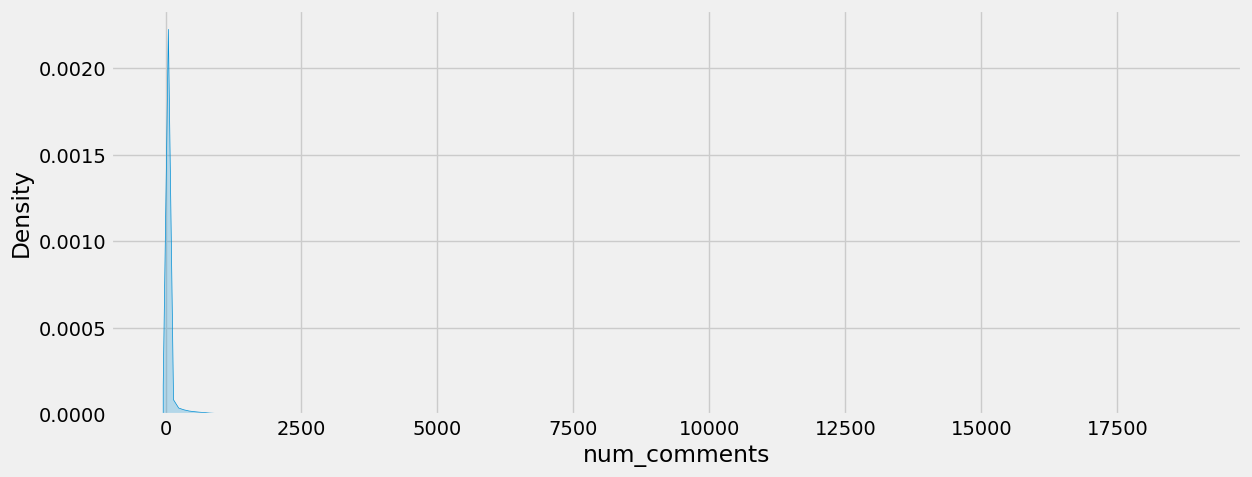

In [16]:
plt.figure(figsize=(13,5))

sns.kdeplot(data['num_comments'], shade=  True)

In [26]:
data[data['score'] == data['score'].max()]['title'].iloc[0]

'Imagine having to pay money to share your data. Save net neutrality today!'

In [27]:
def remove_line_breaks(text):
    text = text.replace('\r', ' ').replace('\n', ' ')
    return text

#remove punctuation
def remove_punctuation(text):
    re_replacements = re.compile("__[A-Z]+__")  # such as __NAME__, __LINK__
    re_punctuation = re.compile("[%s]" % re.escape(string.punctuation))
    '''Escape all the characters in pattern except ASCII letters and numbers'''
    tokens = word_tokenize(text)
    tokens_zero_punctuation = []
    for token in tokens:
        if not re_replacements.match(token):
            token = re_punctuation.sub(" ", token)
        tokens_zero_punctuation.append(token)
    return ' '.join(tokens_zero_punctuation)

def remove_special_characters(text):
    text = re.sub('[^a-zA-z0-9\s]', '', text)
    return text

def lowercase(text):
    text_low = [token.lower() for token in word_tokenize(text)]
    return ' '.join(text_low)

def remove_stopwords(text):
    stop = set(stopwords.words('english'))
    word_tokens = nltk.word_tokenize(text)
    text = " ".join([word for word in word_tokens if word not in stop])
    return text

#remobe one character words
def remove_one_character_words(text):
    '''Remove words from dataset that contain only 1 character'''
    text_high_use = [token for token in word_tokenize(text) if len(token)>1]      
    return ' '.join(text_high_use)   
    
#%%
# Stemming with 'Snowball stemmer" package
def stem(text):
    stemmer = nltk.stem.snowball.SnowballStemmer('english')
    text_stemmed = [stemmer.stem(token) for token in word_tokenize(text)]        
    return ' '.join(text_stemmed)

def lemma(text):
    wordnet_lemmatizer = WordNetLemmatizer()
    word_tokens = nltk.word_tokenize(text)
    text_lemma = " ".join([wordnet_lemmatizer.lemmatize(word) for word in word_tokens])       
    return ' '.join(text_lemma)


#break sentences to individual word list
def sentence_word(text):
    word_tokens = nltk.word_tokenize(text)
    return word_tokens
#break paragraphs to sentence token 
def paragraph_sentence(text):
    sent_token = nltk.sent_tokenize(text)
    return sent_token    


def tokenize(text):
    """Return a list of words in a text."""
    return re.findall(r'\w+', text)

def remove_numbers(text):
    no_nums = re.sub(r'\d+', '', text)
    return ''.join(no_nums)



def clean_text(text):
    _steps = [
    remove_line_breaks,
    remove_one_character_words,
    remove_special_characters,
    lowercase,
    remove_punctuation,
    remove_stopwords,
    stem,
    remove_numbers
]
    for step in _steps:
        text=step(text)
    return text   
#%%

In [28]:
data['clean_title'] = pd.Series([clean_text(i) for i in tqdm(data['title'])])

100%|██████████| 183890/183890 [07:45<00:00, 395.28it/s]


Wordcloud

In [29]:
words = data["clean_title"].values

In [30]:
ls = []

for i in words:
    ls.append(str(i))

In [31]:
ls[:5]

['oc bar chart race anim creat covid confirm case built automat adob effect',
 'uk labour conserv vote share age group ',
 'noc number wallet return across world',
 'largest banana produc countri  oc',
 'oc popular combin stamistudio everyday ita bag']

(-0.5, 1599.5, 799.5, -0.5)

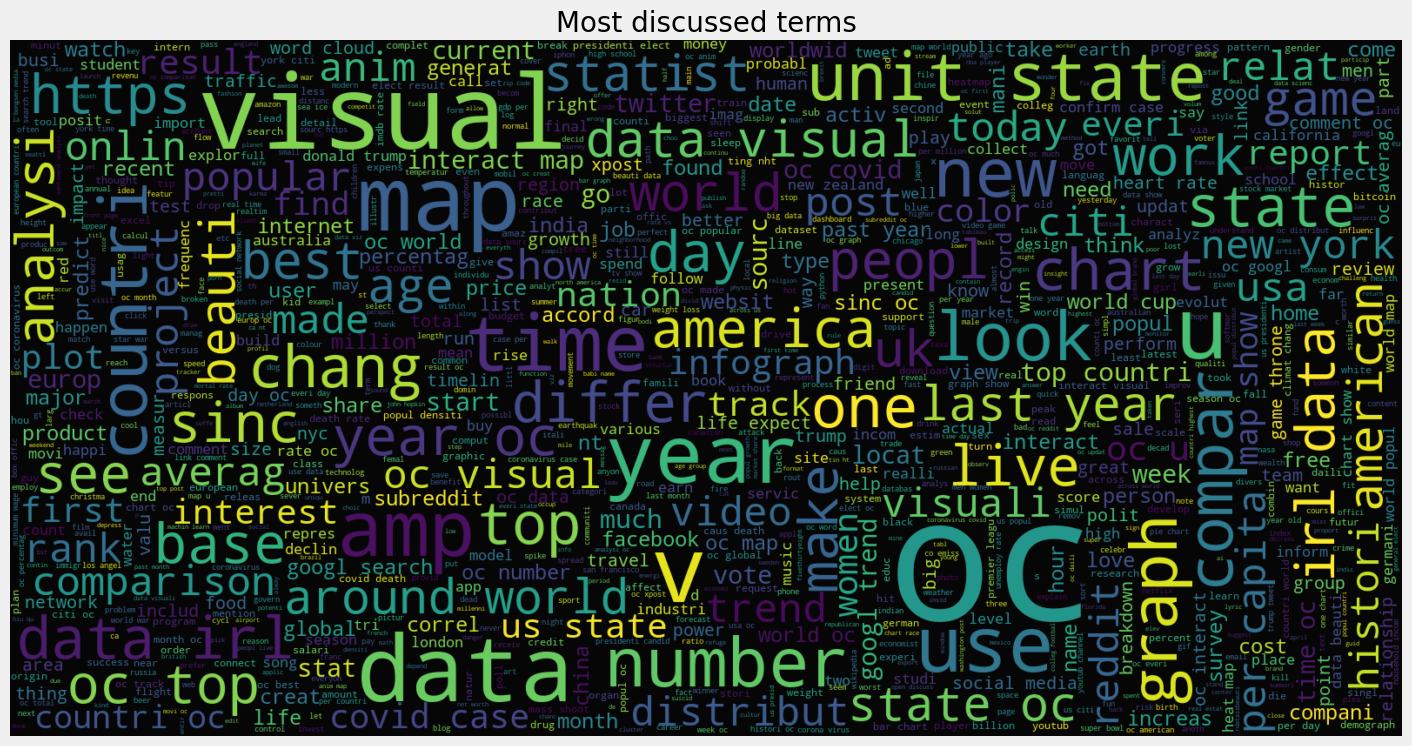

In [32]:
# The wordcloud of Cthulhu/squidy thing for HP Lovecraft
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="black", max_words=1000, max_font_size= 200,  width=1600, height=800)
wc.generate(" ".join(ls))
plt.title("Most discussed terms", fontsize=20)
plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), alpha=0.98, interpolation="bilinear", )
plt.axis('off')

Most popular posts

In [33]:
most_pop = data.sort_values('score', ascending =False)[['title', 'score']].head(12)

most_pop['score1'] = most_pop['score']/1000

Text(0.5, 1.0, 'Most popular posts')

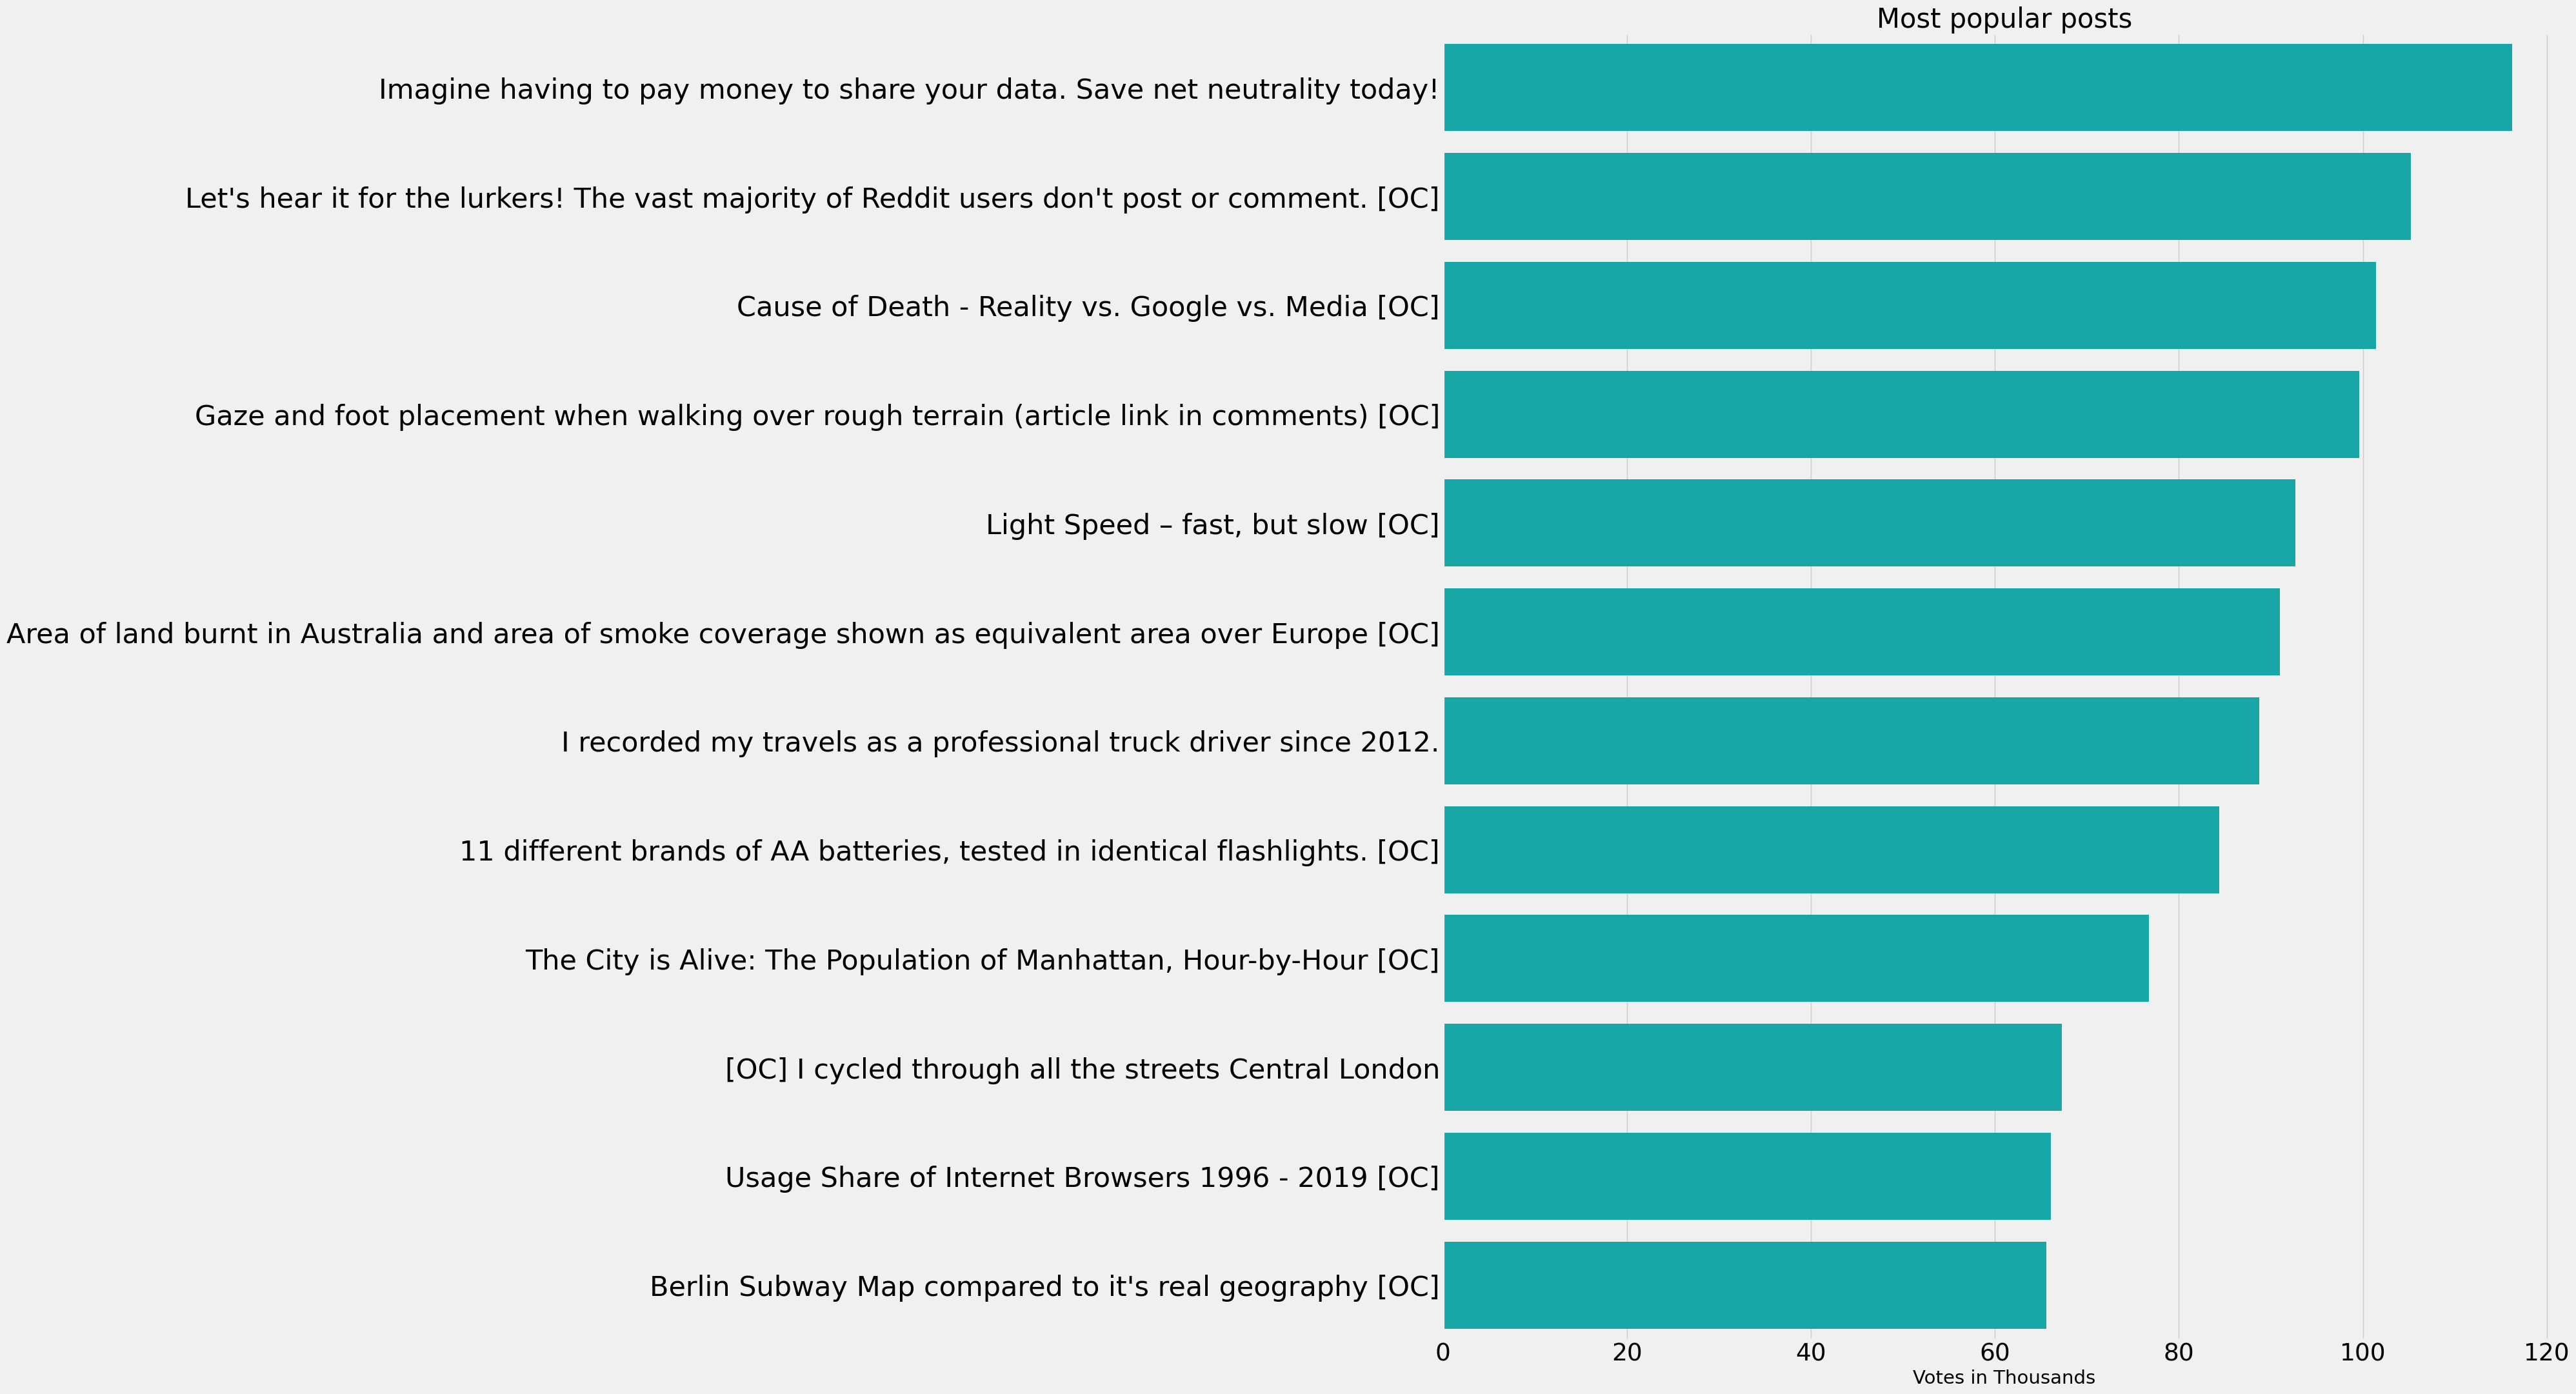

In [34]:
plt.figure(figsize = (20,25))

sns.barplot(data = most_pop, y = 'title', x = 'score1', color = 'c')
plt.xticks(fontsize=27, rotation=0)
plt.yticks(fontsize=31, rotation=0)
plt.xlabel('Votes in Thousands', fontsize = 21)
plt.ylabel('')
plt.title('Most popular posts', fontsize = 30)

In [35]:
most_com = data.sort_values('num_comments', ascending =False)[['title', 'num_comments', 'author']].head(12)
most_com['num_comments1'] = most_com['num_comments']/1000

In [36]:
x = data.reset_index()
x[x['index'] == 92800]

,index,title,score,author,num_comments,over_18,clean_title
92800,92800,"May 21, 2017...5:45 a.m. I am at the Jack in t...",1,Gen-Sylvia-Lydia-Mor,0,False,may jack box veteran ave


In [37]:
most_com = most_com[most_com.author != 'dinoignacio']

Text(0.5, 1.0, 'Most commented posts')

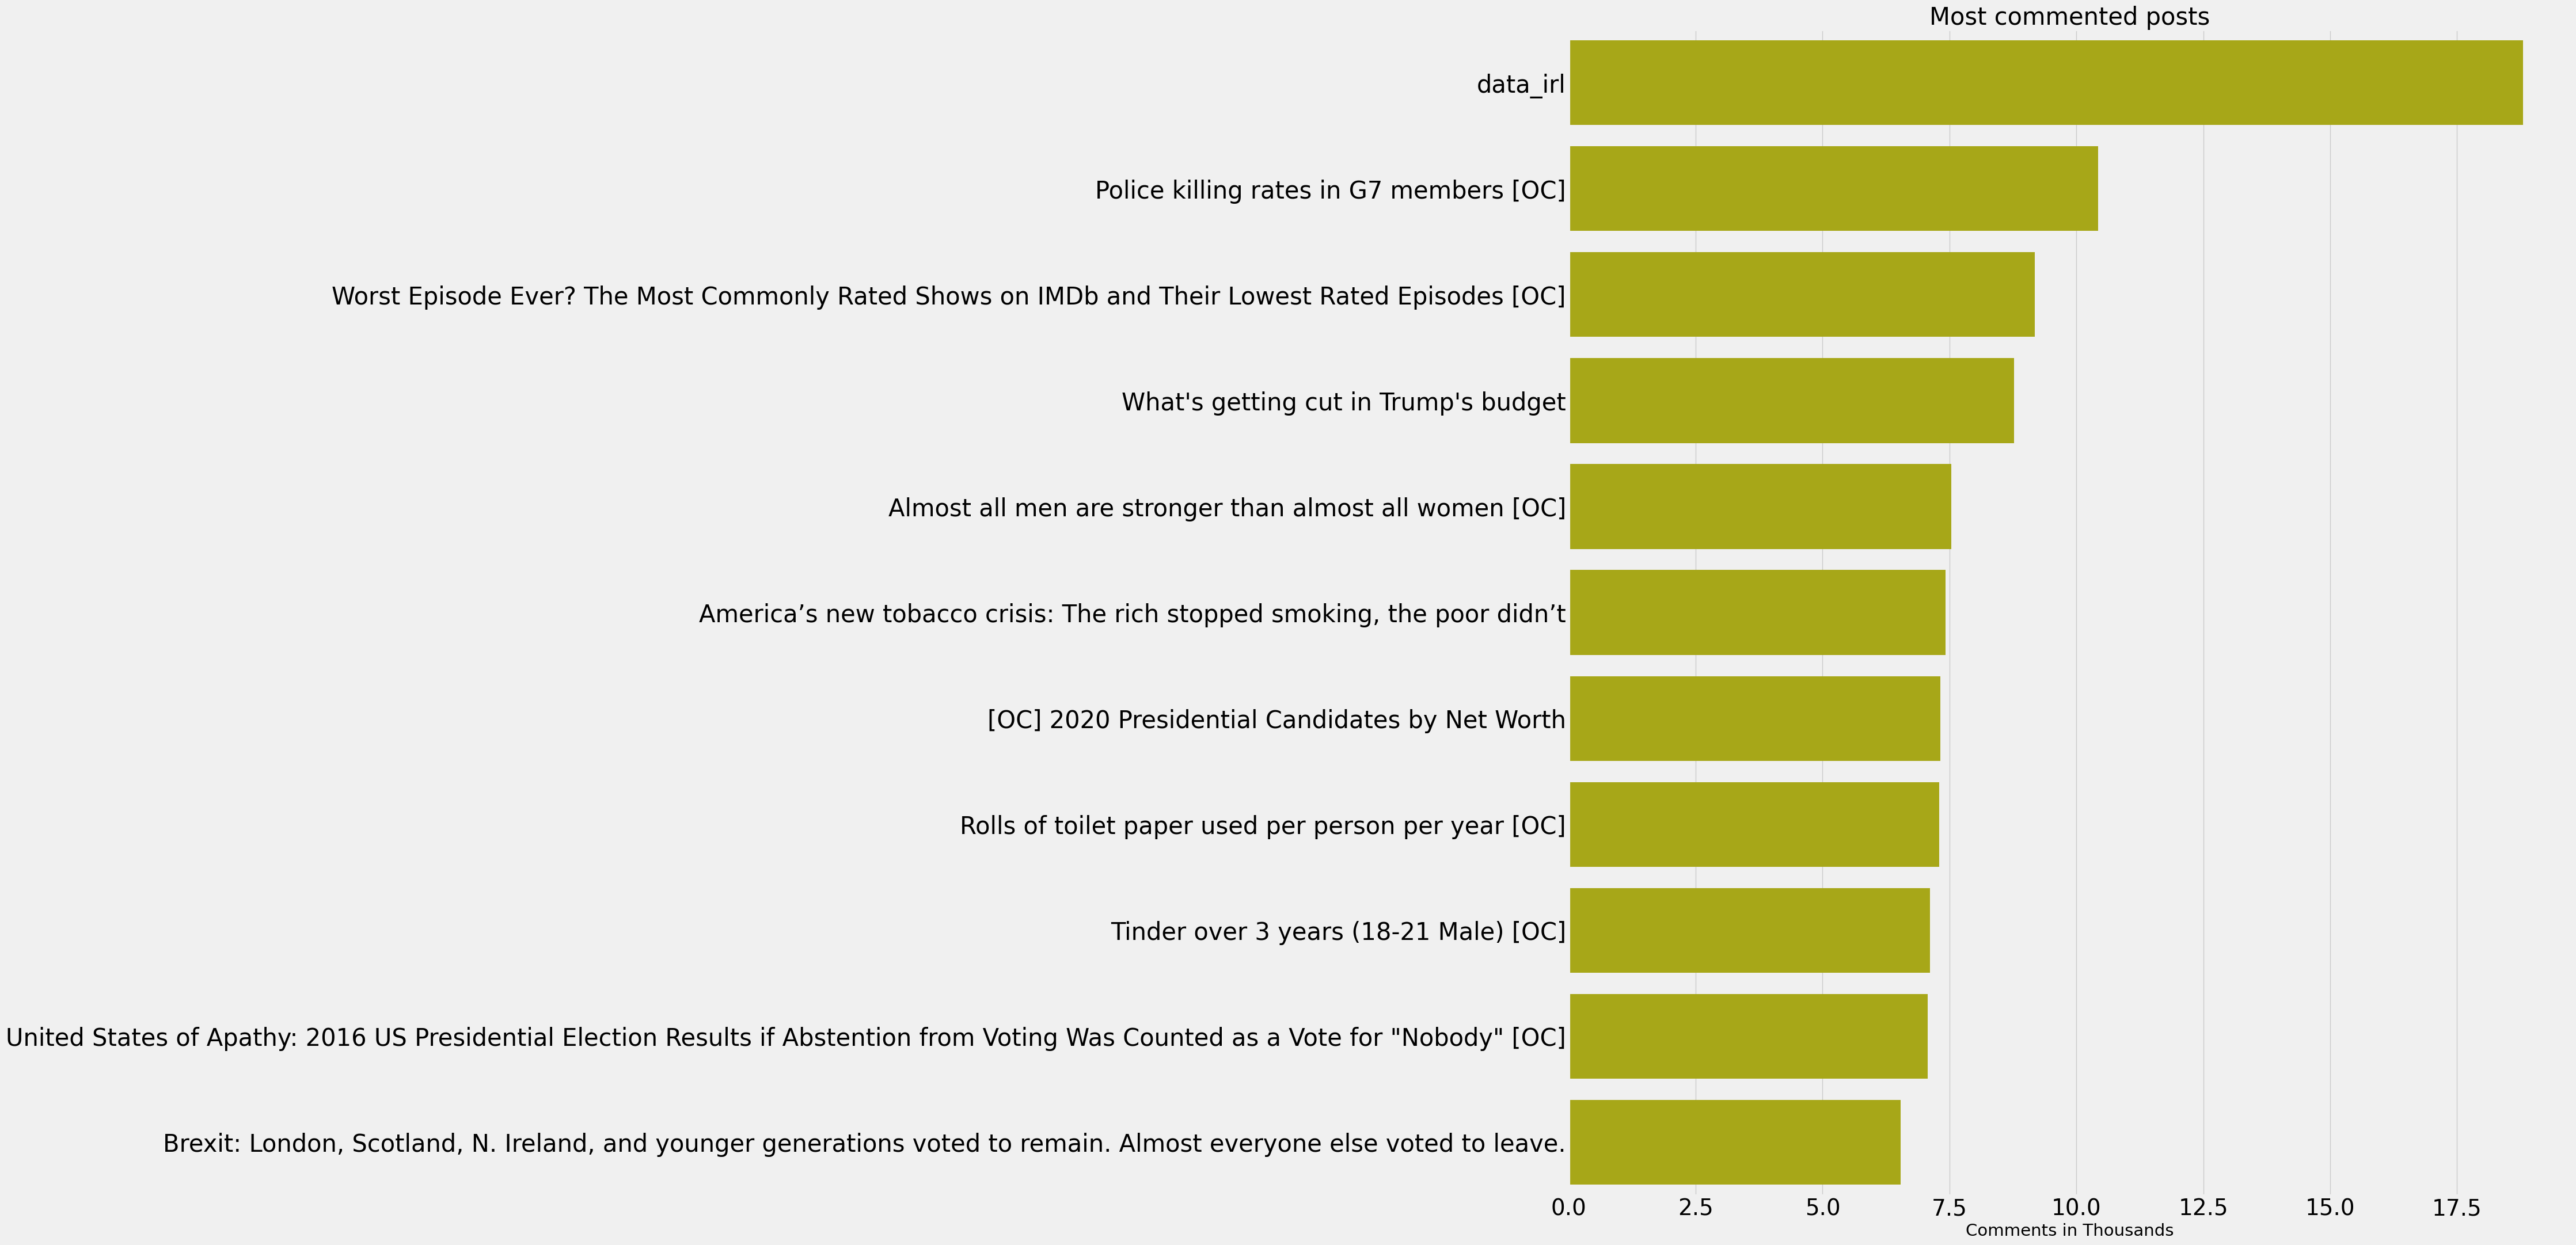

In [38]:
plt.figure(figsize = (20,25))

sns.barplot(data = most_com, y = 'title', x = 'num_comments1', color = 'y')
plt.xticks(fontsize=28, rotation=0)
plt.yticks(fontsize=30, rotation=0)
plt.xlabel('Comments in Thousands', fontsize = 21)
plt.ylabel('')
plt.title('Most commented posts', fontsize = 30)

In [39]:
most_com.head(10)

,title,num_comments,author,num_comments1
98008,data_irl,18801,mungoflago,18.801
75778,Police killing rates in G7 members [OC],10425,Udzu,10.425
14033,Worst Episode Ever? The Most Commonly Rated Sh...,9179,BoMcCready,9.179
99347,What's getting cut in Trump's budget,8768,Prince-Akeem,8.768
118108,Almost all men are stronger than almost all wo...,7538,grasshoppermouse,7.538
90687,America’s new tobacco crisis: The rich stopped...,7418,OverflowDs,7.418
20187,[OC] 2020 Presidential Candidates by Net Worth,7323,lyon-,7.323
10495,Rolls of toilet paper used per person per year...,7303,theimpossiblesalad,7.303
35558,Tinder over 3 years (18-21 Male) [OC],7121,Tyreathian,7.121
69488,United States of Apathy: 2016 US Presidential ...,7073,delugetheory,7.073


In [40]:
n = data.sort_values('score', ascending =False)

n['score1'] = n['score']/1000
n['num_comments1'] = n['num_comments']/1000

Text(0.5, 1.0, 'Comments and votes')

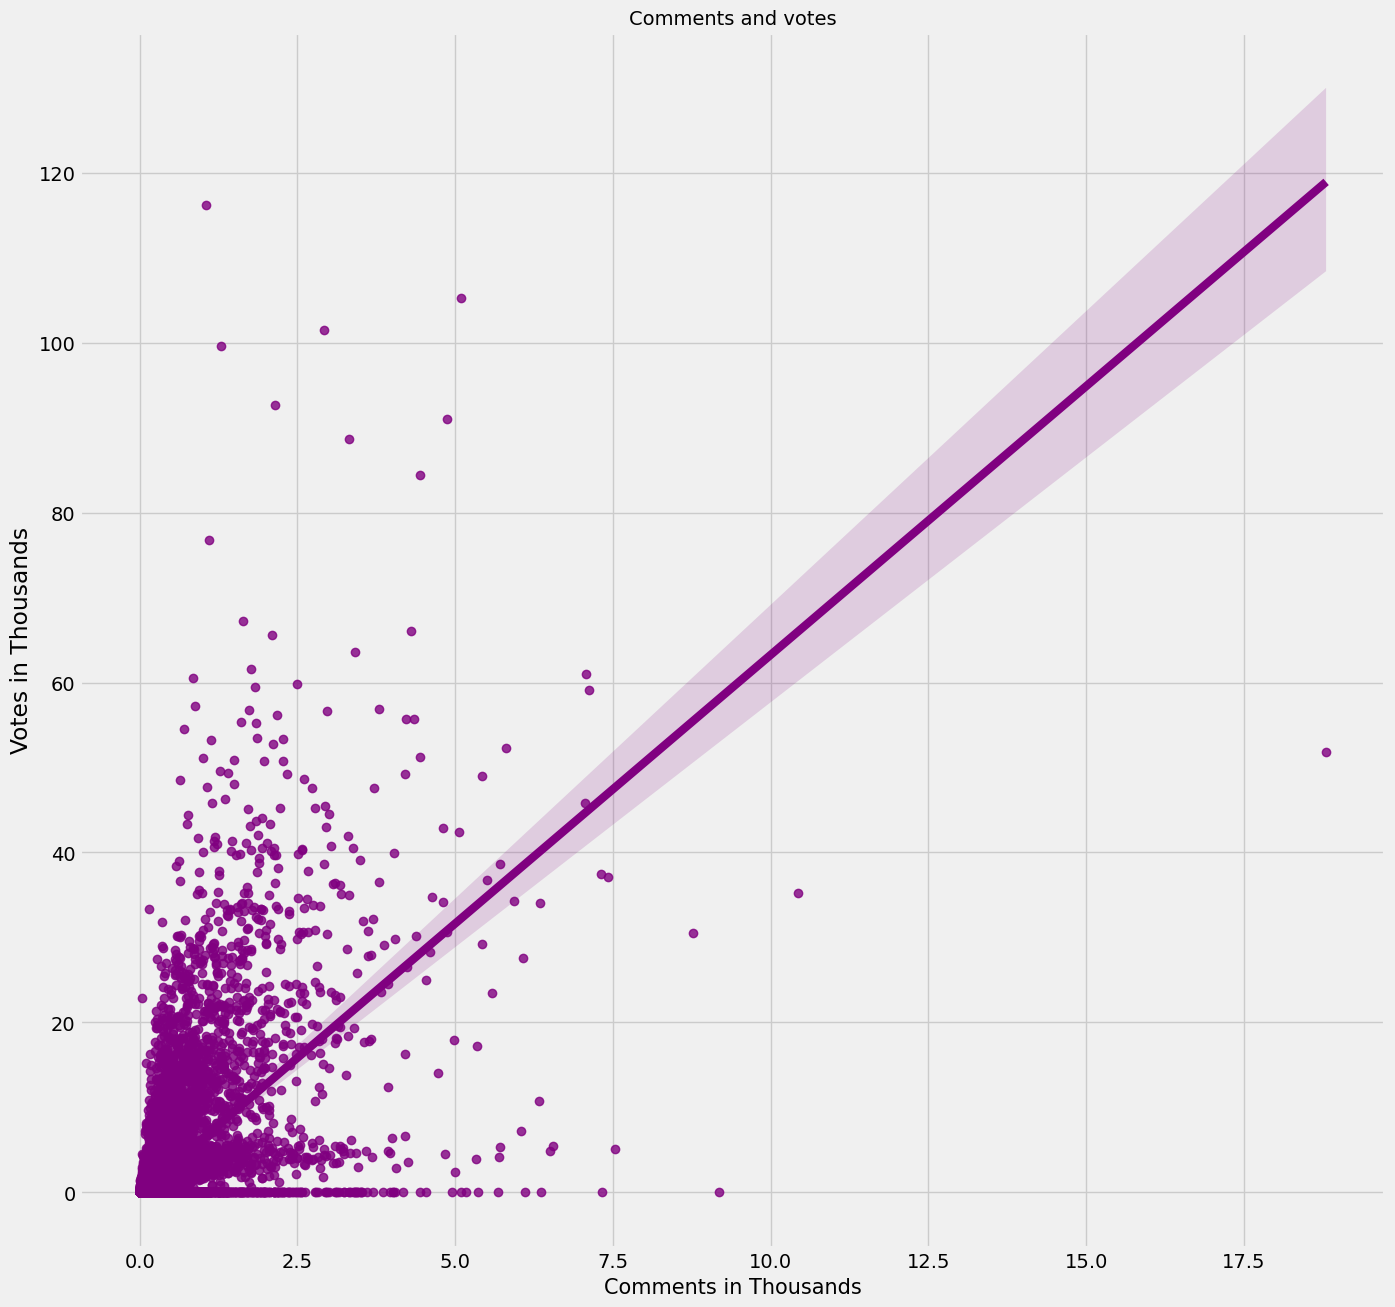

In [41]:
plt.figure(figsize = (15,15))

sns.regplot(data = n, y = 'score1', x = 'num_comments1', color = 'purple')
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
plt.xlabel('Comments in Thousands', fontsize = 15)
plt.ylabel('Votes in Thousands')
plt.title('Comments and votes', fontsize = 14)